In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns 


# Business Objectives


- Analyzing inventory data to find trends and patterns in sales, stock levels, and customer demand is the project's commercial goal. 

- Finding out which products are selling well, which are underperforming, and where there could be chances to improve efficiency and cut costs in the inventory management process are the main objectives. 

- With the ultimate goal of increasing profitability and customer pleasure, the research will guide decisions on stocking levels, ordering frequency, and product promotions.




In [3]:
# Load data into DataFrame 

customers_data = pd.read_csv(r"C:\Users\Dell\Documents\Hero Vired Documents\Hero Vired DHL Capstone Project Belong\customers.csv")
orders_data = pd.read_csv(r"C:\Users\Dell\Documents\Hero Vired Documents\Hero Vired DHL Capstone Project Belong\orders.csv")
products_data = pd.read_csv(r"C:\Users\Dell\Documents\Hero Vired Documents\Hero Vired DHL Capstone Project Belong\products.csv")
sales_data = pd.read_csv(r"C:\Users\Dell\Documents\Hero Vired Documents\Hero Vired DHL Capstone Project Belong\Sales.csv")

# Basic Descriptive Analysis - Quality check of the customers table data 

In [4]:
customers_data.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [5]:
customers_data.columns

Index(['customer_id', 'customer_name', 'gender', 'age', 'home_address',
       'zip_code', 'city', 'state', 'country'],
      dtype='object')

In [6]:
customers_data.shape   # It provides the details of rows and columns 

(1000, 9)

In [7]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   int64 
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [8]:
customers_data.describe() # It provides the basics statstics details 

,customer_id,age,zip_code
count,1000.000000,1000.000000,1000.000000
mean,500.500000,49.860000,5004.872000
std,288.819436,17.647828,2884.497332
min,1.000000,20.000000,2.000000
25%,250.750000,34.000000,2401.750000
50%,500.500000,50.000000,5083.000000
75%,750.250000,65.000000,7460.250000
max,1000.000000,80.000000,9998.000000


# Missing Data - Data Cleaning

In [9]:
customers_data.isnull()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


In [10]:
customers_data.isnull().sum()  # It return the number of missing values in the table 

customer_id      0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
dtype: int64

# Basic Descriptive Analysis - Quality check of the orders table data

In [11]:
orders_data.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [12]:
orders_data.columns

Index(['order_id', 'customer_id', 'payment', 'order_date', 'delivery_date'], dtype='object')

In [13]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [14]:
# Data Cleaning - finding missing values 
orders_data.isnull()     

,order_id,customer_id,payment,order_date,delivery_date
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,False,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


In [15]:
orders_data.isnull().sum() # It return the number of missing values in the table 

order_id         0
customer_id      0
payment          0
order_date       0
delivery_date    0
dtype: int64

# Basic Descriptive Analysis - Quality check of the products table data

In [16]:
products_data.head()

,product_ID,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [17]:
products_data.columns

Index(['product_ID', 'product_type', 'product_name', 'size', 'colour', 'price',
       'quantity', 'description'],
      dtype='object')

In [18]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_ID    1260 non-null   int64 
 1   product_type  1260 non-null   object
 2   product_name  1260 non-null   object
 3   size          1260 non-null   object
 4   colour        1260 non-null   object
 5   price         1260 non-null   int64 
 6   quantity      1260 non-null   int64 
 7   description   1260 non-null   object
dtypes: int64(3), object(5)
memory usage: 78.9+ KB


In [19]:
products_data.isnull()  # # Missing Data

,product_ID,product_type,product_name,size,colour,price,quantity,description
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1255,False,False,False,False,False,False,False,False
1256,False,False,False,False,False,False,False,False
1257,False,False,False,False,False,False,False,False
1258,False,False,False,False,False,False,False,False


In [20]:
products_data.isnull().sum()  # It return the number of missing values in the table 

product_ID      0
product_type    0
product_name    0
size            0
colour          0
price           0
quantity        0
description     0
dtype: int64

# Basic Descriptive Analysis - Quality check of the sales table data

In [21]:
sales_data.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,0,1,218,105,2,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,481,110,1,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,2,114,3,342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,1002,111,2,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,691,119,3,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
sales_data.columns

Index(['sales_id', 'order_id', 'product_id', 'price_per_unit', 'quantity',
       'total_price', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [23]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     5000 non-null   int64  
 6   Unnamed: 6      0 non-null      float64
 7   Unnamed: 7      0 non-null      float64
 8   Unnamed: 8      0 non-null      float64
 9   Unnamed: 9      0 non-null      float64
 10  Unnamed: 10     0 non-null      float64
 11  Unnamed: 11     0 non-null      float64
 12  Unnamed: 12     0 non-null      float64
 13  Unnamed: 13     0 non-null      float64
 14  Unnamed: 14     0 non-null      float64
dtypes: float64(9), int64(6)
memory usage: 586.1 KB


In [24]:
sales_data.isnull() # Missing Data

,sales_id,order_id,product_id,price_per_unit,quantity,total_price,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
4996,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
4997,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
4998,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True


In [25]:
sales_data.isnull().sum()  # It return the number of missing values in the table 

sales_id             0
order_id             0
product_id           0
price_per_unit       0
quantity             0
total_price          0
Unnamed: 6        5000
Unnamed: 7        5000
Unnamed: 8        5000
Unnamed: 9        5000
Unnamed: 10       5000
Unnamed: 11       5000
Unnamed: 12       5000
Unnamed: 13       5000
Unnamed: 14       5000
dtype: int64

In [26]:
# Here I am remove the columnns which contains null values 
sales_data.dropna(axis=1, how='all',inplace = True)   

In [27]:
sales_data

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,105,2,210
1,1,1,481,110,1,110
2,2,1,2,114,3,342
3,3,1,1002,111,2,222
4,4,1,691,119,3,357
...,...,...,...,...,...,...
4995,4995,998,321,108,2,216
4996,4996,998,251,117,3,351
4997,4997,999,872,100,1,100
4998,4998,999,998,111,2,222


# So now I Merge the data to create a comprehensive sales dataset

In [28]:
sales_data = sales_data.merge(orders_data, on='order_id')
sales_data = sales_data.merge(products_data, left_on='product_id', right_on='product_ID')
sales_data = sales_data.merge(customers_data, left_on='customer_id', right_on='customer_id')

In [29]:
sales_data.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,customer_id,payment,order_date,delivery_date,...,quantity_y,description,customer_name,gender,age,home_address,zip_code,city,state,country
0,0,1,218,105,2,210,64,30811,2021-8-30,2021-09-24,...,44,"A orange coloured, L sized, Chambray Shirt",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia
1,1,1,481,110,1,110,64,30811,2021-8-30,2021-09-24,...,62,"A indigo coloured, S sized, Puffer Jacket",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia
2,2,1,2,114,3,342,64,30811,2021-8-30,2021-09-24,...,54,"A red coloured, M sized, Oxford Cloth Shirt",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia
3,3,1,1002,111,2,222,64,30811,2021-8-30,2021-09-24,...,52,"A blue coloured, M sized, Wool Trousers",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia
4,4,1,691,119,3,357,64,30811,2021-8-30,2021-09-24,...,53,"A indigo coloured, S sized, Parka Jacket",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia


In [30]:
sales_data.isnull().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity_x        0
total_price       0
customer_id       0
payment           0
order_date        0
delivery_date     0
product_ID        0
product_type      0
product_name      0
size              0
colour            0
price             0
quantity_y        0
description       0
customer_name     0
gender            0
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

In [31]:
# print top 5 records of columns name order_date

sales_data['order_date'].head()

0    2021-8-30
1    2021-8-30
2    2021-8-30
3    2021-8-30
4    2021-8-30
Name: order_date, dtype: object

In [32]:
# Now create the new column 
# This lines creates the new column in the DataFrame by providing the information of month and year

sales_data['year_month'] = pd.to_datetime(sales_data['order_date'], format='%Y-%m-%d').dt.to_period('M')


In [33]:
sales_data['year_month'].head()

0    2021-08
1    2021-08
2    2021-08
3    2021-08
4    2021-08
Name: year_month, dtype: period[M]

In [34]:
 sales_data['year_month'].isnull

<bound method Series.isnull of 0       2021-08
1       2021-08
2       2021-08
3       2021-08
4       2021-08
         ...   
4995    2021-03
4996    2021-10
4997    2021-10
4998    2021-10
4999    2021-10
Name: year_month, Length: 5000, dtype: period[M]>

# Analyze Sales Trends

In [35]:
# Creating the new variable which called monthly_sales for finding the sales on the year and month basis 
# Monthly sales trends

monthly_sales = sales_data.groupby('year_month')['total_price'].sum()
monthly_sales 

year_month
2021-01    120935
2021-02     97786
2021-03    133335
2021-04     99527
2021-05     87354
2021-06    104411
2021-07    118582
2021-08    106928
2021-09     97568
2021-10     85334
Freq: M, Name: total_price, dtype: int64

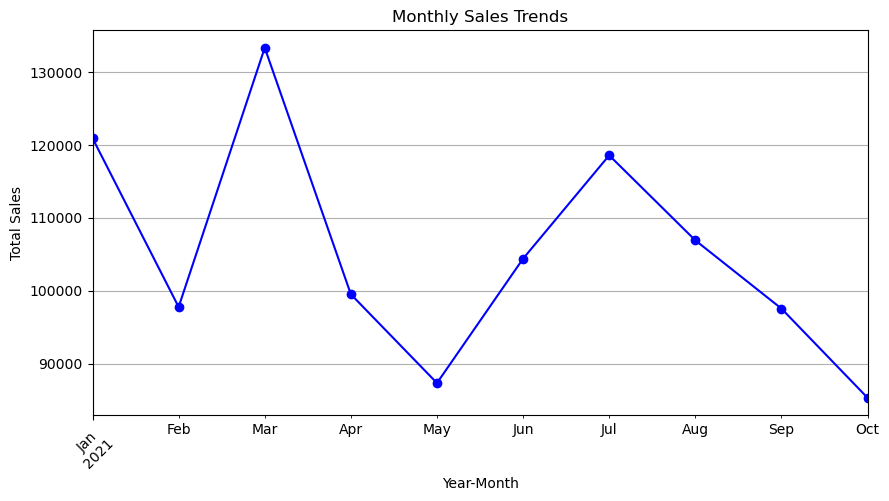

In [36]:
# So now we examine Data Insights visuallly 

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line',marker='o',color = 'b')
plt.title('Monthly Sales Trends')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# The month of March had the highest Total Sales. And the month of October had the lowest Total Sales 

In [37]:
# Create new column to find total_sales from the sales_data table 

total_sales = sales_data['total_price'].sum()
print("Total Sales:", total_sales)

Total Sales: 1051760


# Trends Over Time 

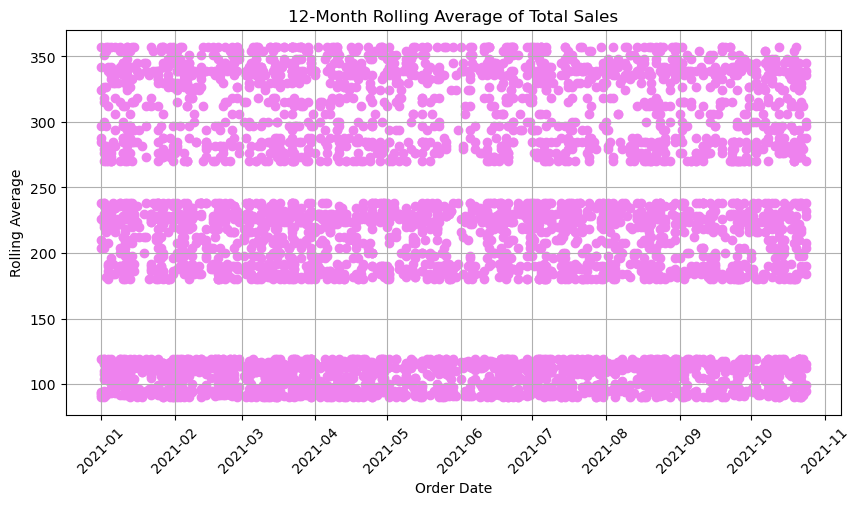

In [38]:
# Seasonality sales trends patterns

sales_data_copy = sales_data.copy()

# Convert the 'order_date' column to datetime format (if not already)
sales_data_copy['order_date'] = pd.to_datetime(sales_data_copy['order_date'], format='%Y-%m-%d')


plt.figure(figsize=(10, 5))
plt.scatter(sales_data_copy['order_date'], sales_data_copy['total_price'], color='violet')
plt.title('12-Month Rolling Average of Total Sales')
plt.xlabel('Order Date')
plt.ylabel('Rolling Average')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format x-axis as YYYY-MM
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [39]:
sales_data_copy.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,customer_id,payment,order_date,delivery_date,...,description,customer_name,gender,age,home_address,zip_code,city,state,country,year_month
0,0,1,218,105,2,210,64,30811,2021-08-30,2021-09-24,...,"A orange coloured, L sized, Chambray Shirt",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,2021-08
1,1,1,481,110,1,110,64,30811,2021-08-30,2021-09-24,...,"A indigo coloured, S sized, Puffer Jacket",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,2021-08
2,2,1,2,114,3,342,64,30811,2021-08-30,2021-09-24,...,"A red coloured, M sized, Oxford Cloth Shirt",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,2021-08
3,3,1,1002,111,2,222,64,30811,2021-08-30,2021-09-24,...,"A blue coloured, M sized, Wool Trousers",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,2021-08
4,4,1,691,119,3,357,64,30811,2021-08-30,2021-09-24,...,"A indigo coloured, S sized, Parka Jacket",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,2021-08


# Outliers or Anomalies 

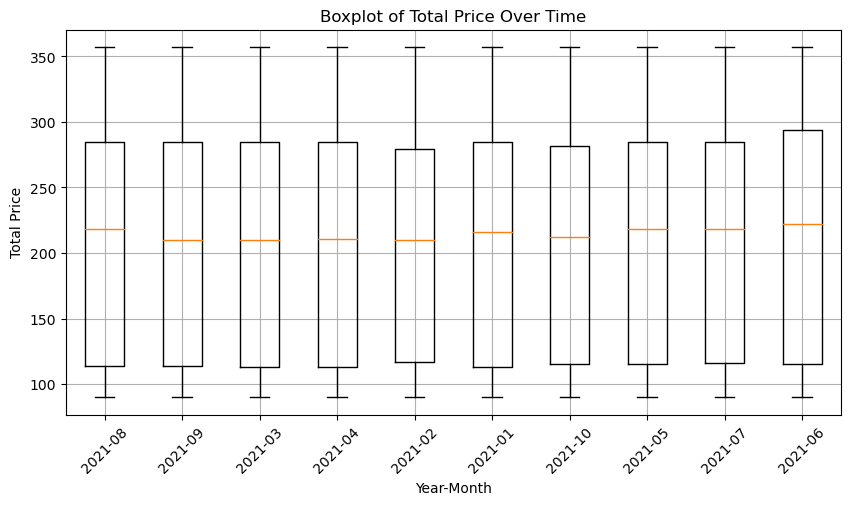

In [40]:
plt.figure(figsize=(10, 5))
plt.boxplot([group['total_price'] for name, group in sales_data.groupby('year_month')], labels=sales_data['year_month'].unique(), vert=True)
plt.title('Boxplot of Total Price Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [41]:
# Yearly Variation (assuming data spans multiple years)

yearly_variation = sales_data.groupby(sales_data['year_month'])['total_price'].sum()
print("Yearly Variation:")
print(yearly_variation)

Yearly Variation:
year_month
2021-01    120935
2021-02     97786
2021-03    133335
2021-04     99527
2021-05     87354
2021-06    104411
2021-07    118582
2021-08    106928
2021-09     97568
2021-10     85334
Freq: M, Name: total_price, dtype: int64


In [42]:
yearly_variation.dtypes

dtype('int64')

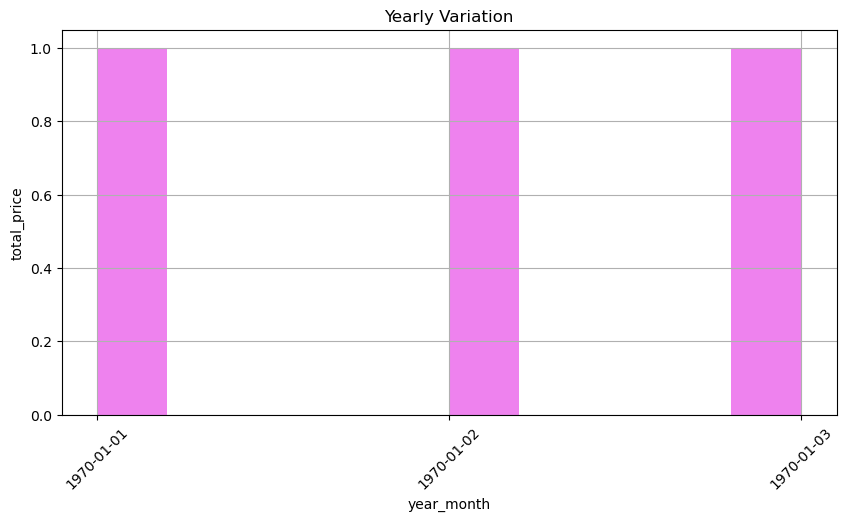

In [43]:
plt.figure(figsize=(10, 5))
data = list(['Yearly Variation','total_price','year_month']) # create the list because histogram support the univariate analysis
plt.hist(data, color='violet')   
plt.title('Yearly Variation')
plt.xlabel('year_month')
plt.ylabel('total_price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format x-axis as YYYY-MM
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Analyze Popular Products

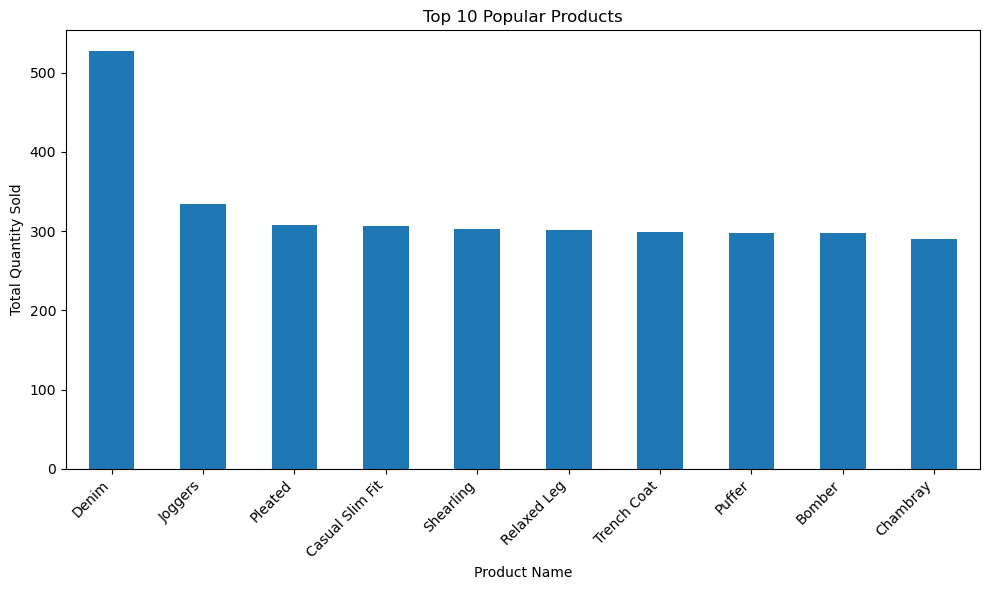

In [44]:
popular_products = sales_data.groupby('product_name')['quantity_x'].sum().sort_values(ascending=False)

# Limit the number of displayed products (e.g., top 10)
top_n = 10
popular_products = popular_products.head(top_n)

plt.figure(figsize=(10, 6))
ax = popular_products.plot(kind='bar')
plt.title('Top {} Popular Products'.format(top_n))
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Ensure labels are not cut off
plt.show()


# - Denim are popular products with the highest total quantity sold

# Customer Gender Distribution

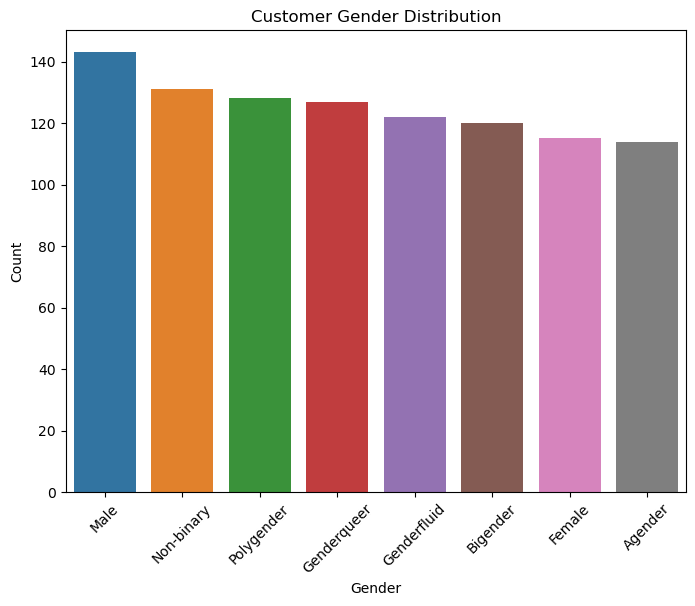

In [45]:
# Apply rotation here for gender column 

customer_gender = customers_data['gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_gender.index, y=customer_gender.values)
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

plt.show()

In [46]:
customers_data.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


Correlation between quantity and age: 0.009289636321775305


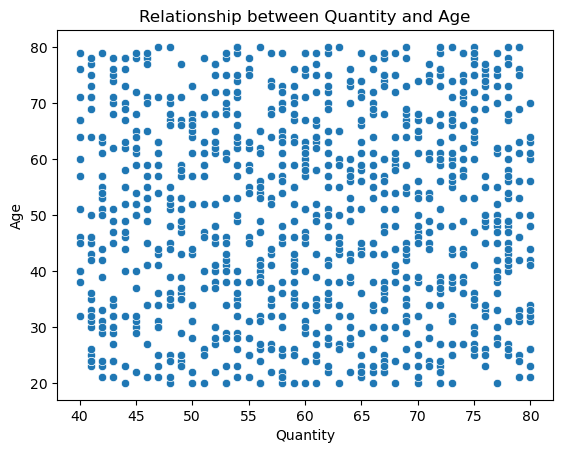

In [47]:
correlation = products_data["quantity"].corr(customers_data["age"])
print(f"Correlation between quantity and age: {correlation}")

# Create a scatter plot to visualize the relationship
sns.scatterplot(data=products_data, x="quantity", y=customers_data["age"])
plt.xlabel("Quantity")
plt.ylabel("Age")
plt.title("Relationship between Quantity and Age")
plt.show()


In [48]:
# Conclusion and Insights
# - Monthly sales trends show variations, with potential seasonality.
# - Denim cloths are popular products with the highest total quantity sold.
# - The customer base includes various gender identities, with a diverse customer population.
